# <center><font color = 'crimson'>Malarial Cell Detection<font/><center/>

# <font color = 'green'>Importing Libraries</font>

In [1]:
import os
import cv2
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow.keras.layers as k
from PIL import Image
from tqdm.notebook import tqdm
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
warnings.filterwarnings('ignore')

# <font color = 'purple'>Training & Testing Data</font>

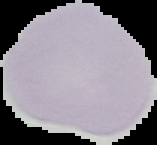

In [3]:
load_img('cell_images/Uninfected/C203ThinF_IMG_20151029_102123_cell_51.png')

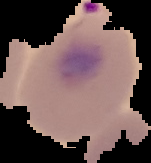

In [4]:
load_img('cell_images/Parasitized/C48P9thinF_IMG_20150721_162732_cell_21.png')

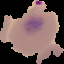

In [5]:
load_img('cell_images/Parasitized/C48P9thinF_IMG_20150721_162732_cell_21.png', target_size=(64, 64))

In [6]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
np.random.seed(312)

In [7]:
image_dir = 'cell_images/'
size = 64
dataset = []
label = []

In [8]:
parasitized_img = os.listdir(image_dir + 'Parasitized/')

for i, img_name in enumerate(tqdm(parasitized_img)):
    
    if (img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + 'Parasitized/' + img_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((size, size))
        
        dataset.append(np.array(image))
        label.append(0)

  0%|          | 0/13780 [00:00<?, ?it/s]

In [9]:
len(parasitized_img)

13780

In [10]:
uninfected_img = os.listdir(image_dir + 'Uninfected/')

for i, img_name in enumerate(tqdm(uninfected_img)):
    
    if (img_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + 'Uninfected/' + img_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((size, size))
        
        dataset.append(np.array(image))
        label.append(1)

  0%|          | 0/13780 [00:00<?, ?it/s]

In [11]:
len(uninfected_img)

13780

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.2, random_state = 0)

In [13]:
len(xtrain)

22046

In [14]:
len(xtest)

5512

# <font color = 'yellow'>CNN Model Architecture</font>

In [15]:
Input_shape = (size, size, 3)

inp = k.Input(shape = Input_shape)

conv1 = k.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(inp)
pool1 = k.MaxPool2D(pool_size = (2,2))(conv1)
norm1 = k.BatchNormalization(axis = -1)(pool1)
drop1 = k.Dropout(rate = 0.2)(norm1)

conv2 = k.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop1)
pool2 = k.MaxPool2D(pool_size = (2,2))(conv2)
norm2 = k.BatchNormalization(axis = -1)(pool2)
drop2 = k.Dropout(rate = 0.2)(norm2)

flat = k.Flatten()(drop2)

hidden1 = k.Dense(512, activation = 'relu')(flat)
norm3 = k.BatchNormalization(axis = -1)(hidden1)
drop3 = k.Dropout(rate = 0.2)(norm3)

hidden2 = k.Dense(256, activation = 'relu')(hidden1)
norm4 = k.BatchNormalization(axis = -1)(hidden2)
drop4 = k.Dropout(rate = 0.2)(norm4)

out = k.Dense(2, activation = 'sigmoid')(drop4)

In [16]:
model = keras.Model(inputs = inp, outputs = out)
model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

# <font color = 'blue'>Training Model</font>

In [18]:
history = model.fit(x=np.array(xtrain), y=ytrain,
                   batch_size = 64, verbose = 1, epochs = 10,
                   validation_split = 0.1, shuffle = False)

Epoch 1/5
311/311 [==============================] - 126s 392ms/step - loss: 0.5869 - accuracy: 0.7110 - val_loss: 3.1624 - val_accuracy: 0.5868
Epoch 2/5
311/311 [==============================] - 129s 415ms/step - loss: 0.2615 - accuracy: 0.9031 - val_loss: 0.5590 - val_accuracy: 0.8508
Epoch 3/5
311/311 [==============================] - 128s 411ms/step - loss: 0.2076 - accuracy: 0.9258 - val_loss: 0.3931 - val_accuracy: 0.8553
Epoch 4/5
311/311 [==============================] - 133s 426ms/step - loss: 0.1802 - accuracy: 0.9361 - val_loss: 0.4068 - val_accuracy: 0.8599
Epoch 5/5
311/311 [==============================] - 134s 431ms/step - loss: 0.1520 - accuracy: 0.9459 - val_loss: 0.2139 - val_accuracy: 0.9293


In [33]:
np.array(ytrain).shape

(22046, 2)

In [19]:
print('Test Accuracy : {:.2f}%'.format(model.evaluate(np.array(xtest), np.array(ytest))[1]*100))

173/173 [==============================] - 9s 54ms/step - loss: 0.2152 - accuracy: 0.9283
Test Accuracy : 92.83%


In [35]:
red=model.predict(np.array(xtest))

173/173 [==============================] - 7s 41ms/step


In [39]:
np.argmax(red[2])

1

In [36]:
red.argmax()

10870

# <font color='aqua'>Visualising Model Performance<font/>

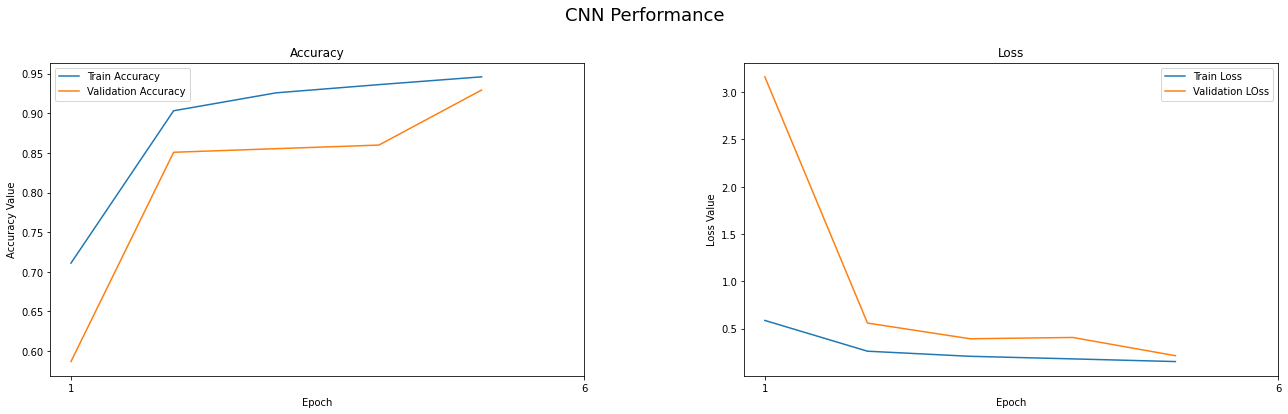

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6)) 
t = f.suptitle('CNN Performance', fontsize=18) 
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1 
epoch_list = list(range(1,max_epoch))

ax1.plot(epoch_list, history.history['accuracy'], label = 'Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label = 'Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch + 1, 5)) 
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch') 
ax1.set_title('Accuracy')
l1 = ax1.legend(loc = "best")

ax2.plot(epoch_list, history.history['loss'], label = 'Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label = 'Validation LOss')
ax2.set_xticks(np.arange(1, max_epoch + 1, 5)) 
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch') 
ax2.set_title('Loss')
l2 = ax2.legend(loc = "best")

In [21]:
# from keras.applications.resnet import ResNet50

In [22]:
# pip install keras_applications


In [23]:

# model = ResNet50(weights='imagenet')


In [24]:
# model.save('models/model_resnet.h5')

In [26]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 

INFO:tensorflow:Assets written to: ram://c621534a-6e8a-47a8-8d72-f951d47a0e8f/assets


INFO:tensorflow:Assets written to: ram://c621534a-6e8a-47a8-8d72-f951d47a0e8f/assets


In [28]:
import tensorflow as tf

In [29]:
tf.keras.models.save_model(model,'my_model.h5')
